In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nrrd
import cv2

In [52]:
os.chdir(r'C:\Users\wrrog\Istituto dei Tumori\Cooperative Loss')
os.getcwd()

'C:\\Users\\wrrog\\Istituto dei Tumori\\Cooperative Loss'

In [53]:
# Takes in an a 3d masked image and returns it cropped of emptry space around the edges
def cropIt(img, msk, verbose = False):
    zs = []
    # Get all slices on the z axis with no data
    for z in range(msk.shape[-1]):
        if msk[:,:,z].sum() == 0:
            zs.append(z)
    
    if verbose:
        print("Image shape:", img.shape)
        print("deleting Zs:", zs)
    
    msk = np.delete(msk,zs,axis=2) # Delete the slices on the z axis
    img = np.delete(img,zs,axis=2)
    
    xs = []     
    # Get all slices on the x axis with no data       
    for x in range(msk.shape[0]):
        if msk[x,:,:].sum() == 0:
            xs.append(x) # Delete the slices on the x axis

    if verbose:
        print("Image shape:", img.shape)
        print("deleting Zs:", xs)
            
    msk = np.delete(msk,xs,axis=0)
    img = np.delete(img,xs,axis=0)

    ys = []
    # Get all slices on the y axis with no data           
    for y in range(msk.shape[1]):
        if msk[:,y,:].sum() == 0:
            ys.append(y) # Delete the slices on the y axis
            
    if verbose:
        print("Image shape:", img.shape)
        print("deleting Zs:", ys)
            
    msk = np.delete(msk,ys,axis=1)
    img = np.delete(img,ys,axis=1)
    
    if verbose:
        print("Image shape:", img.shape)
    
    return img, msk

In [54]:
data_dir = 'D:\Data\MAASTRO-CT-Lung1(nrrds)'
folders  = os.listdir(data_dir)
folders  = [folder for folder in folders if folder[:5] == "LUNG1"]
folders_path  = [os.path.join(data_dir, folder) for folder in folders]

In [55]:
img_path = os.path.join(folders_path[0], 'image.nrrd')
msk_path = os.path.join(folders_path[0], 'mask.nrrd')
img, img_header = nrrd.read(img_path)
msk, msk_header = nrrd.read(msk_path)
img.shape

(512, 512, 134)

In [56]:
img_cropped, msk_cropped = cropIt(img, msk)
img_cropped.shape

(97, 90, 21)

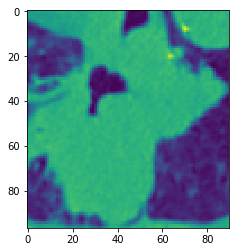

In [57]:
plt.imshow(img_cropped[:, :, 10])

In [58]:
#os.mkdir('data')
#os.mkdir('data/cropped')
os.chdir('data/cropped')

In [88]:
length = len(folders)
shapes = np.empty((length,3))
for n, folder in enumerate(zip(folders, folders_path)):
    #if n > 5: break
    dir_list = os.listdir()

        
    img_path = os.path.join(folder[1], 'image.nrrd')
    msk_path = os.path.join(folder[1], 'mask.nrrd')
    img, img_header = nrrd.read(img_path)
    msk, msk_header = nrrd.read(msk_path)
    img_cropped, msk_cropped = cropIt(img, msk)

    if folder[0][:9] not in dir_list:
        os.mkdir(folder[0][:9])
        np.save(folder[0][:9]+"/image.npy", img_cropped)
        np.save(folder[0][:9]+"/mask.npy", msk_cropped)

    else:
        os.mkdir(folder[0][:9]+'a')
        np.save(folder[0][:9]+'a'+"/image.npy", img_cropped)
        np.save(folder[0][:9]+'a'+"/mask.npy", msk_cropped)
        
    shapes[n] = np.array(msk_cropped.shape)
    print("Completed:", folder[0][:9])


Completed: LUNG1-001
Completed: LUNG1-002
Completed: LUNG1-003
Completed: LUNG1-004
Completed: LUNG1-005
Completed: LUNG1-006
Completed: LUNG1-007
Completed: LUNG1-008
Completed: LUNG1-009
Completed: LUNG1-010
Completed: LUNG1-011
Completed: LUNG1-012
Completed: LUNG1-013
Completed: LUNG1-014
Completed: LUNG1-015
Completed: LUNG1-016
Completed: LUNG1-017
Completed: LUNG1-018
Completed: LUNG1-019
Completed: LUNG1-020
Completed: LUNG1-021
Completed: LUNG1-022
Completed: LUNG1-023
Completed: LUNG1-024
Completed: LUNG1-025
Completed: LUNG1-026
Completed: LUNG1-027
Completed: LUNG1-028
Completed: LUNG1-029
Completed: LUNG1-030
Completed: LUNG1-031
Completed: LUNG1-032
Completed: LUNG1-033
Completed: LUNG1-034
Completed: LUNG1-035
Completed: LUNG1-036
Completed: LUNG1-037
Completed: LUNG1-038
Completed: LUNG1-039
Completed: LUNG1-040
Completed: LUNG1-041
Completed: LUNG1-042
Completed: LUNG1-043
Completed: LUNG1-044
Completed: LUNG1-045
Completed: LUNG1-046
Completed: LUNG1-047
Completed: LU

Completed: LUNG1-392
Completed: LUNG1-393
Completed: LUNG1-394
Completed: LUNG1-395
Completed: LUNG1-395
Completed: LUNG1-396
Completed: LUNG1-397
Completed: LUNG1-398
Completed: LUNG1-399
Completed: LUNG1-399
Completed: LUNG1-400
Completed: LUNG1-401
Completed: LUNG1-402
Completed: LUNG1-403
Completed: LUNG1-404
Completed: LUNG1-405
Completed: LUNG1-406
Completed: LUNG1-407
Completed: LUNG1-408
Completed: LUNG1-409
Completed: LUNG1-410
Completed: LUNG1-411
Completed: LUNG1-412
Completed: LUNG1-413
Completed: LUNG1-414
Completed: LUNG1-415
Completed: LUNG1-416
Completed: LUNG1-417
Completed: LUNG1-418
Completed: LUNG1-419
Completed: LUNG1-420
Completed: LUNG1-421
Completed: LUNG1-422


In [80]:
maxes = []

(6, 3)

In [89]:
shapes

array([[ 97.,  90.,  21.],
       [100.,  99.,  26.],
       [ 45.,  73.,  17.],
       ...,
       [ 43.,  37.,  11.],
       [ 53.,  57.,  15.],
       [ 45.,  42.,  16.]])

In [90]:
shapes[0]

array([97., 90., 21.])

In [96]:
print(np.max(shapes[:,0]), np.max(shapes[:,1]), np.max(shapes[:,2]) )

135.0 150.0 55.0
